# Testing the *CoupledNormal* class

In [1]:
import sys
# insert at 1, 0 is the script path (or '' in REPL)
path = r'C:\Users\jkcle\Documents\GitHub\Nonlinear-Statistical-Coupling\nsc\util'
sys.path.insert(1, path)
import function as f

import function_john as fj

import coupled_probability_quad_int_multi_dims as cpqi
import function as func
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Define the loc, scale, alpha, and kappas that will be used for all distributions.
loc, scale = 0, 1
alpha = 2
dim = 2

my_normal = multivariate_normal(mean=[0, 0])

support = [[-18, 18], [-18, 18]]

# Testing the *coupled_cross_entropy* function

In [2]:
cpqi.coupled_cross_entropy(my_normal.pdf, 
                           my_normal.pdf, 
                           kappa=0, 
                           alpha=alpha, 
                           dim=dim, 
                           support=support,
                           root=True)

2.3519878900327895

In [3]:
cpqi.coupled_cross_entropy(my_normal.pdf, 
                           my_normal.pdf, 
                           kappa=0, 
                           alpha=alpha, 
                           dim=dim, 
                           support=support,
                           root=False)

2.837877066409345

# Testing the *coupled_entropy* function

In [4]:
cpqi.coupled_entropy(my_normal.pdf, 
                     kappa=0, 
                     alpha=alpha, 
                     dim=dim, 
                     support=support,
                     root=False)

2.837877066409345

In [5]:
cpqi.coupled_entropy(my_normal.pdf, 
                     kappa=0, 
                     alpha=alpha, 
                     dim=dim, 
                     support=support,
                     root=True)

2.3519878900327895

# Testing the *coupled_divergence* function

In [6]:
cpqi.coupled_divergence(my_normal.pdf, 
                        my_normal.pdf, 
                        kappa=0, 
                        alpha=alpha, 
                        dim=dim, 
                        support=support,
                        root=False)

0.0

In [7]:
cpqi.coupled_divergence(my_normal.pdf, 
                        my_normal.pdf, 
                        kappa=0, 
                        alpha=alpha, 
                        dim=dim, 
                        support=support,
                        root=True)

0.0

# Plotting the *coupled_entropy* function

In [9]:
from tqdm import tqdm
# plt.figure(figsize=(12, 8))
Y = {}
plot_coupledEntropy = []
plot_coupledEntropy_root = []
plot_tsallisEntropyNormalized = []
plot_tsallisEntropy = []
plot_tsallisEntropyRootNormalized = []
plot_tsallisEntropyRoot = []
plot_shannonEntropy = []
plot_shannonEntropy_root = []

kappa_values = [round(value, 1) for value in np.linspace(0, 4, 41)]
n = len(kappa_values)

mu, cov = [0, 0], np.array([[1, 0],
                            [0, 1]])

dim = len(mu)
alpha = 2

for i in tqdm(range(len(kappa_values))):
    kappa = kappa_values[i]
    temp_normal = multivariate_normal(mean=mu, cov=cov)
    y = temp_normal.pdf
    Y[kappa] = cpqi.coupled_entropy(y, kappa=kappa, alpha=alpha, dim=dim, support=support, root=False)
    plot_coupledEntropy.append(Y[kappa])
    Y[kappa] = cpqi.coupled_entropy(y, kappa=kappa, alpha=alpha, dim=dim, support=support, root=True)
    plot_coupledEntropy_root.append(Y[kappa])
    Y[kappa] = cpqi.tsallis_entropy(y, kappa=kappa, alpha=alpha, dim=dim, support=support, normalize=True, root=False)
    plot_tsallisEntropyNormalized.append(Y[kappa])
    Y[kappa] = cpqi.tsallis_entropy(y, kappa=kappa, alpha=alpha, dim=dim, support=support, normalize=False, root=False)
    plot_tsallisEntropy.append(Y[kappa])
    Y[kappa] = cpqi.tsallis_entropy(y, kappa=kappa, alpha=alpha, dim=dim, support=support, normalize=True, root=True)
    plot_tsallisEntropyRootNormalized.append(Y[kappa])
    Y[kappa] = cpqi.tsallis_entropy(y, kappa=kappa, alpha=alpha, dim=dim, support=support, normalize=False, root=True)
    plot_tsallisEntropyRoot.append(Y[kappa])
    Y[kappa] = cpqi.shannon_entropy(y, dim=dim, support=support, root=False)
    plot_shannonEntropy.append(Y[kappa])
    Y[kappa] = cpqi.shannon_entropy(y, dim=dim, support=support, root=True)
    plot_shannonEntropy_root.append(Y[kappa])

100%|██████████| 41/41 [39:02<00:00, 57.14s/it]


In [10]:
plot_coupledEntropy = np.array(plot_coupledEntropy)
plot_coupledEntropy_root = np.array(plot_coupledEntropy_root)
plot_tsallisEntropyNormalized = np.array(plot_tsallisEntropyNormalized)
plot_tsallisEntropy = np.array(plot_tsallisEntropy)
plot_tsallisEntropyRootNormalized = np.array(plot_tsallisEntropyRootNormalized)
plot_tsallisEntropyRoot = np.array(plot_tsallisEntropyRoot)
plot_shannonEntropy = np.array(plot_shannonEntropy)
plot_shannonEntropy_root = np.array(plot_shannonEntropy_root)

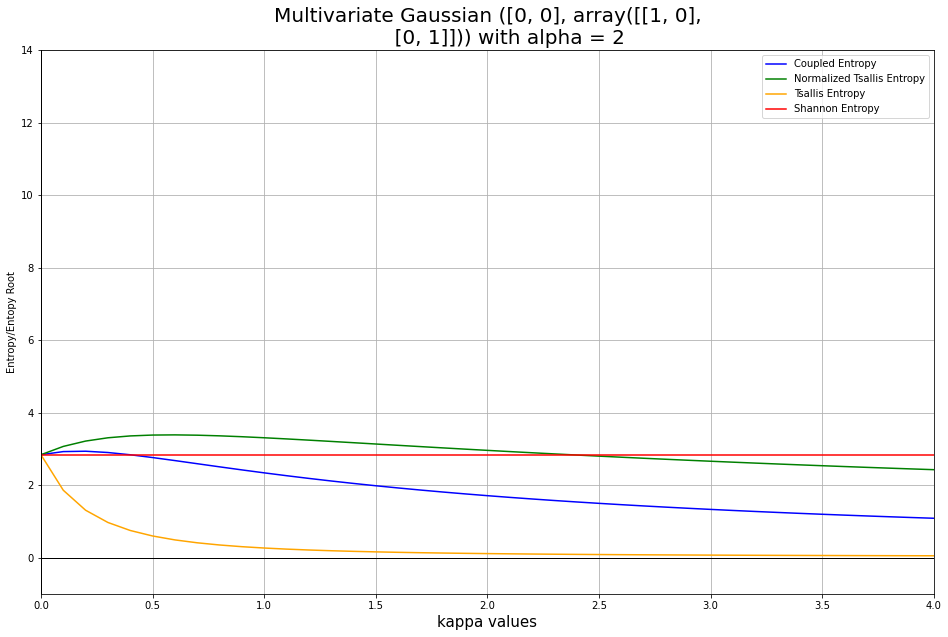

In [11]:
fig, ax = plt.subplots(figsize=(16, 10))
ax.axvline(c='black', lw=1)
ax.axhline(c='black', lw=1)

cm = plt.get_cmap('PiYG')
plt.xlim(0, 4)
plt.ylim(-1, 14)
plt.plot(kappa_values, plot_coupledEntropy, label='Coupled Entropy',
         color='blue')
plt.plot(kappa_values, plot_tsallisEntropyNormalized, label='Normalized Tsallis Entropy',
         color='green')
plt.plot(kappa_values, plot_tsallisEntropy, label='Tsallis Entropy',
         color='orange')
plt.plot(kappa_values, plot_shannonEntropy, label='Shannon Entropy',
         color='red')

plt.grid()
plt.title(f'Multivariate Gaussian {(mu), (cov)} with alpha = {alpha}', fontsize=20)
plt.xlabel('kappa values', fontsize=15)
plt.ylabel('Entropy/Entopy Root')
plt.legend()
plt.show();

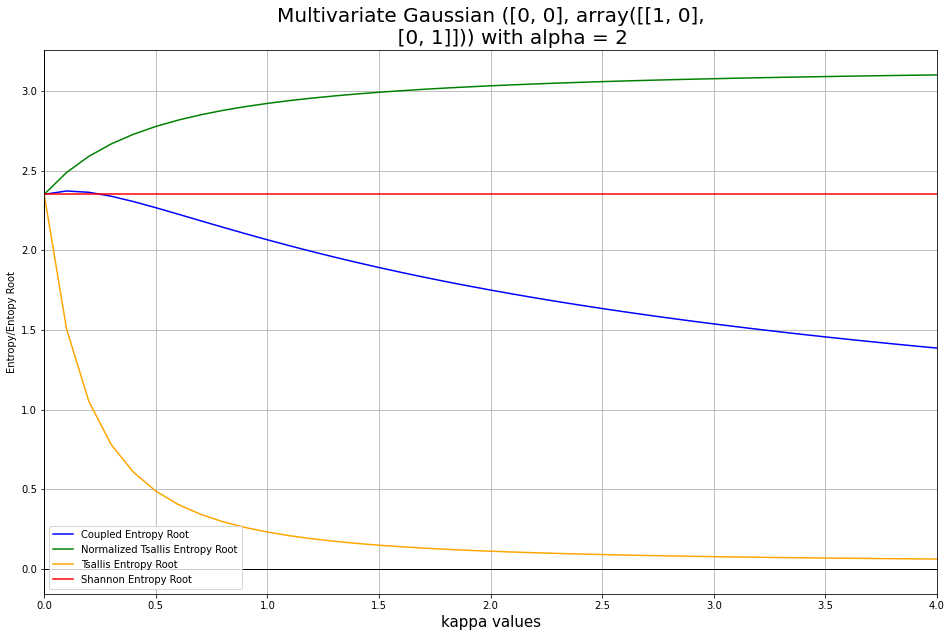

In [13]:
fig, ax = plt.subplots(figsize=(16, 10))
ax.axvline(c='black', lw=1)
ax.axhline(c='black', lw=1)

cm = plt.get_cmap('PiYG')
plt.xlim(0, 4)
#plt.ylim(-1, 6)

plt.plot(kappa_values, plot_coupledEntropy_root, label='Coupled Entropy Root',
         color='blue')
plt.plot(kappa_values, plot_tsallisEntropyRootNormalized, label='Normalized Tsallis Entropy Root',
         color='green')
plt.plot(kappa_values, plot_tsallisEntropyRoot, label='Tsallis Entropy Root',
         color='orange')
plt.plot(kappa_values, plot_shannonEntropy_root, label='Shannon Entropy Root',
         color='red')
plt.grid()
plt.title(f'Multivariate Gaussian {mu, cov} with alpha = {alpha}', fontsize=20)
plt.xlabel('kappa values', fontsize=15)
plt.ylabel('Entropy/Entopy Root')
plt.legend()
plt.show();

# Comparison between Numerical Approximation and Exact Entropy of Multivariate Normal

In [14]:
from scipy.stats import multivariate_normal

my_cov = np.array([[1., 0.],
                   [0., 1.]])

my_means = np.array([0., 0.])

dim = len(my_means)

support =  [[-18, 18], [-18, 18]]

multi_var_normal = multivariate_normal(mean=my_means, cov=my_cov)

exact_mvn_entropy = 0.5 * np.log(np.linalg.det(2 * np.pi * np.exp(1) * my_cov))
numerical_approx_mvn_entropy = cpqi.shannon_entropy(multi_var_normal.pdf, dim=dim, support=support, root=False)

print(f"Numerical Approximation to MVN {my_means, my_cov} Entropy: {numerical_approx_mvn_entropy}")
print(f"Exact Gaussian {my_means, my_cov} Entropy: {exact_mvn_entropy}")

Numerical Approximation to MVN (array([0., 0.]), array([[1., 0.],
       [0., 1.]])) Entropy: 2.837877066409345
Exact Gaussian (array([0., 0.]), array([[1., 0.],
       [0., 1.]])) Entropy: 2.8378770664093453
